# ASTR 21100 

# "Computational Techniques in Astrophysics"

## Instructor: Andrey Kravtsov

### office: ERC 415; email: kravtsov@uchicago.edu
### office hours: Tue, 10:30am-noon (unless noted otherwise)

#### Teaching Assistants: 
#### Dimitrios Tanoglidis (dtanoglidis@uchicago.edu)
#### Georgios Zakharegkas (gzakharegkas@uchicago.edu)

In [6]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline
# reusing my codes from the repository
from codes.plot_utils import plot_pretty
plot_pretty(dpi=150, fontsize=12)

In [7]:
plot_pretty(dpi=150, fontsize=12)

### Sampling random numbers from a 1-dimensional probability distribution function (pdf)

Such sampling involves two steps: 

1) a sequence of random, uniformly distributed numbers in the $[a,b]$ interval (this is handled by PRNG codes, see <a href="06a_prngs.ipynb"><tt>06a_prngs.ipynb</tt></a>)

2) a transformation of that sequence from the uniform pdf to a desired pdf.

### Definitions of the pdf and cdf

* **Probability distribution function (pdf)** (sometimes called probability density function), $p(x)$, is a positive function, $p(x)\geq 0$, defined such that $p(x)dx$ measures probability for $x$ to be in the interval $[x,x+dx)$. 

Integral over all $x$ for a properly normalized pdf is $\int^\infty_{-\infty}p(x)dx=1$ because probability of any $x$ should be 1 by definition. 

* **Cumulative distribution function (cdf)** is defined as 

$$F(x) = \int\limits_{-\infty}^x p(x^\prime) dx^\prime.$$
If $p(x)\geq 0$ and is normalized as above, it is clear that $F$ varies monotonically from $0$ to $1$, as $x$ increases from the lower to the upper limits of the interval on which $p(x)$ is defined. 

**Note 1.** Whether pdf must be so normalized depends on its application. If we need only ratios such as $p(x_2)/p(x_1)$ then normalization is not relevant. Thus, for certain methods, such as MCMC normalization is not important.  

**Note 2.** Given that $p(x)dx$ is probability, which is dimensionless, if $x$ has some dimension (for example, grams), then $p(x)$ also must have dimension of $[x^{-1}]$ (i.e., inverse grams) so that product of $p(x)$ and $dx$ is dimensionless. Remembering that pdf has dimensions inverse of the dimension of its parameter is useful when algebraic operations with pdfs are performed, as we will see later. 

### Random sampling from pdfs

The two simplest and widely used methods to sample non-uniform 1-D pdfs (or in some cases low-dimensional ones) -- the inverse transform sampling and rejection sampling -- were laid out on one page in a letter by John von Neumann to Stanislaw Ulam written on May 21, 1947. 

The latter was known previously in a different context (geometric estimates of probability), but it was von Neumann who re-invented rejection sampling and made it popular in the context of Monte Carlo methods. 

<center><img width=600 src="img/von_neumann_letter1.png"></img></center>

### Inverse transform sampling

Inverse transform method uses the *inverse* of the cdf of $p(x)$, to draw $x$. Namely, if $y=F(x)$, inverse of the cdf is $x=F^{-1}(y)$. 

Assume that you want a random sample $x$ drawn from the distribution function $p(x)$: which is usually denoted as $x\sim p(x)$. 

If $y$ is a random number drawn from a uniform distribution defined on the $[0,1)$ interval, $y\sim u_{[0,1)}$, $x=F^{-1}(y)$ will be drawn from $p(x)$. 

Uniform pdf on interval $[a,b]$ is defined as 

$$u_{[a,b]}=\begin{cases}
1/(b-a),\ \ \mathrm{if}\ x\in[a,b]\\
0,\ \ \mathrm{otherwise}
\end{cases}$$

For some cdfs inverse $F^{-1}$ can be obtained in simple explicit analytic form. For many other cdfs no explicit solution is possible. In such cases, the *implicit* equation $F(x)=y$ can be solved numerically for each $y$. Von Neumann in his letter (see the quote above) suggests inverting in such cases by approximating $y(F)$ by an "approximant polynomial." You also saw in hw 2 (task 1f) that spline can be used effectively for this purpose. 

Good choices for these are global polynomial interpolation using Chebyshev nodes (but never equidistant nodes!) or *splines*. 

Yet again, we see how simpler, basic numerical methods are used as ingredients of other numerical methods.

### Why does the inverse transform method work? geometric interpretation

The meaning of the method can be grasped by visualizing the cumulative pdf, $y=F(x)$ in the $x-y$ plane. Suppose we draw samples from the uniform distribution along $y$. The probability of a sample to fall within some interval $dy$ is $u_{[0,1]}dy=dy$ for $y\in [0,1]$. What will be the corresponding interval $dx$ along $x=F^{-1}(y)$ axis that corresponds to $dy$? 

Geometrically, $dx = dy/\tan\alpha= dy/(dF/dx) = dy/p(x)$, where $\alpha$ is the local slope of the cdf,  $\tan\alpha(x) = dF/dx=p(x)$:


Thus, uniform distribution of points in the vertical $y$ axis will turn into distribution of points in the horizonthal $x$ axis with density function $p(x)$, because $dy = p(x)dx$, which is precisely what we want.

### An exercise to practice inverse transform method of generating random samples 

Write a routine that generates random samples $\{y_i\}$ from the exponential pdf 
$p_{\rm exp}(y) = \exp(-y/\beta)/\beta$ defined for $y\in [0,\infty)$ (and $p_{\rm exp}(y)=0$ for $y<0$). Test it for some values of $\beta$ (e.g., $\beta=3$), using an input 
vector of uniformly distributed numbers.

In [14]:
def pdf_exp(x, beta):
    """
    normalized exponential PDF p(x)= e^{-x/\beta}/\beta
    
    Parameters:
    -----------
    x: 1d numpy array of real numbers 
    beta: a real non-zero number
        
    Returns:
    --------
    a 1d numpy vector of real numbers equal to the PDF values at input x values
    """
    assert(beta != 0.)
    return np.exp(-x/beta)/beta


In [3]:
from numpy import random as rnd

def invcdf_exp(x, beta):
    """
    analytic inverse of the exponential CDF
    """
    assert(beta != 0.)
    
    return -beta*np.log(1.-x)

# then use plotting routine below to plot their distribution 
# and to check that it is correct by comparing it to the analytic pdf

Nrnd = 100000
# generate a vector of Nrnd uniformly distributed numbers over [0.,1.]
xrnd = rnd.uniform(0., 1., Nrnd)


beta = 3.0
yexp = invcdf_exp(xrnd, beta)

In [12]:

def plot_exp_pdf(yexp, func, fname=None, label='inverse method', 
                 bins = 50, xlims=[0.,30.], ylims=[1.e-6, 0.4], args=None, figsize=3):
    plt.figure(figsize=(figsize, figsize))
    plt.yscale('log')
    plt.xlim(xlims); plt.ylim(ylims)

    # compute histogram values (could be improved with KDE)
    hist, bins, patches = plt.hist(yexp, density='True', 
                                   color='slateblue', bins=bins, label=label)
    binc = 0.5*(bins[1:] + bins[:-1]) # compute bin centers
    plt.plot(binc, func(binc, *args), lw=0.8, c='orangered')
    plt.ylabel(r'$p(x)$')
    plt.xlabel(r'$x$')
    if fname: 
        plt.savefig(fname, bbox_inches='tight')
    plt.legend(loc='upper right', frameon=False)
    plt.show()

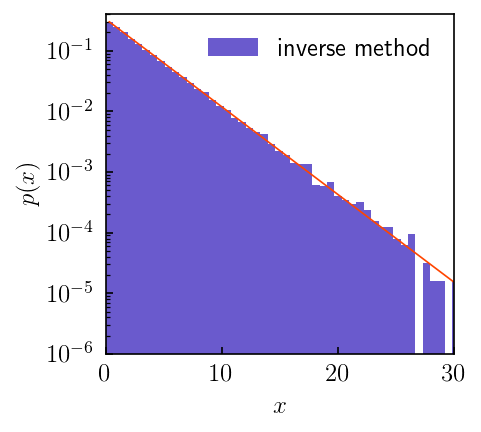

In [13]:
    
plot_exp_pdf(yexp, pdf_exp, label='inverse method', args=[beta,], figsize=3)


### Rejection sampling

If the maximum, $p_{\rm max}$, of the pdf $p(x)$ in the interval $x\in [a, b]$ is known, the random samples of $p(x)$ can be generated by 

1. Drawing two random numbers $x$ and $y$ uniformly distributed in the intervals $[a,b]$ and $[0,p_{\rm max}]$, respectively. 

2. Accepting $x$ as a sample of $p(x)$ if $p(x)\geq y$, or rejecting the draw otherwise and going back to step 1.  

Steps 1 and 2 are repeated until the number of accepted samples of $x$ reaches a desired value.

### Rejection sampling: geometric interpretation

The logic of this method is best grasped visually: we are throwing "darts" into random locations in the $(x,y)$ plane and accept only those locations that fall under the curve $p(x)$. The fraction of draws accepted in a given interval $dx$ is given by $p(x)$ by construction and result of the rejection sampling will clearly be the set of $x$ that have distribution $p(x)$.  

### An exercise to practice rejection method of generating random samples 

Write a code that generates random samples $\{x_i\}$ from the exponential pdf 
$p_{\rm exp}(y) = \exp(-y/\beta)/\beta$ defined for $x\in [0,\infty)$ (and $p_{\rm exp}(x)=0$ for $x<0$) using rejection sampling. Generate numbers for a fixed number of tries (say 100000). Output both the sampled numbers and the fraction of accepted draws during rejection sampling process.

Test it for some values of $\beta$ (e.g., $\beta=3$), using an input 
vector of uniformly distributed numbers.

In [18]:
Nrnd = 100000
# generate a vector of Nrnd uniformly distributed numbers over [0.,1.]
xrnd = np.random.uniform(0., 30., Nrnd)

In [19]:
# max values on the interval [0,30.] is exp(-0/beta)/beta = 1/beta, so:
beta = 3.
yrnd = rnd.uniform(0.,1./beta, Nrnd)

# numpy allows as to draw samples from xrnd by using the following compact ode
yexp = xrnd[(yrnd < pdf_exp(xrnd,beta))]

print("selected sample of %d exponentially distributed numbers out of %d"%(np.size(yexp), Nrnd))


selected sample of 9886 exponentially distributed numbers out of 100000


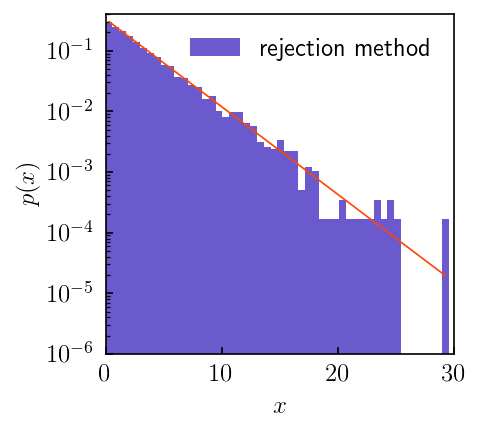

In [20]:
plot_exp_pdf(yexp, pdf_exp, label='rejection method', args=[beta,], figsize=3)

We can see that close to 90% of the generated samples are rejected. This is because they fall into the white area above the $p(x)$ curve, which is quite large. So the method in this basic form is inefficient for functions that change fast and over a wide range like $e^{-\xi/\beta}$ used here. 

Is there a better way?

### Improving efficiency of the rejection method

Yes.  Efficiency can be improved with a variant of the method, in which samples from another pdf, $q(x)$, are used. Function $q(x)$ should be 
a function that is easy to sample with the inverse transform method or any other method. Also, we should have $p(x)<mq(x)$ for all $x\in[a,b]$, where $m$ is some constant.

The algorithm consists of the following steps: 

1. Generate a random sample $x_q$ from $q(x)$.

2. Draw a random number uniformly distributed in $[0,1)$: $u\sim u_{[0,1)}$; 

3. Accept the draw $x_q$ as a sample of $p(x)$, if $u\leq p(x_q)/[m q(x_q)]$. 

Here for illustration I use $q(x)=e^{-x/\beta_2}/\beta_2$, where $\beta_2>\beta$ and $m=c \beta_2/\beta$, where $c$ is a constant just above $1.$ ensures that $mq(c)>p(x)$ everywhere. 


In [21]:
# non-vectorized version
i = 0 
yexp = []
beta2 = 1.01*beta # exponential with a slower rate of decrease
m = 1.1*beta2/beta

itr = 0; Nr = 20000
while i < Nr:
    itr += 1
    xd = rnd.uniform(0., 1.,size=1)
    xr = invcdf_exp(xd, beta2)
    yd = rnd.uniform(0., 1.0)
    #print(xd, xr, yd, pdf_exp(xr,beta)/(m*pdf_exp(xr,beta2)))
    if yd <= pdf_exp(xr,beta)/(m*pdf_exp(xr,beta2)):
        yexp.append(xr)
        i += 1
     
yexp = np.ravel(yexp)
print("selected sample of %d exponentially distributed numbers out of %d"%(np.size(yexp), itr))

selected sample of 20000 exponentially distributed numbers out of 22179


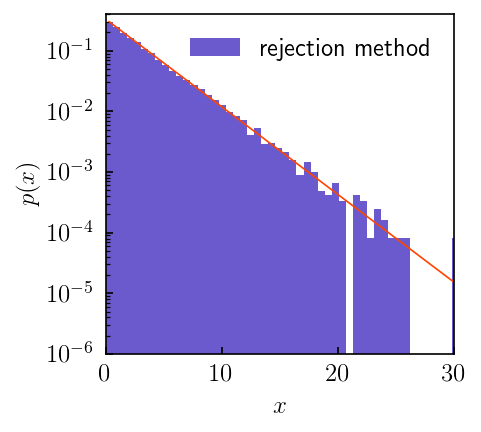

In [22]:
plot_exp_pdf(yexp, pdf_exp, label='rejection method', args=[beta,], figsize=3)

In [23]:
#a vectorized version
beta2 = 1.01*beta # exponential with a slower rate of decrease
m = 1.01*beta2/beta # a factor to make sure that M*g(x) > f(x) everywhere

Nrnd = 100000
xrnd = rnd.uniform(0., 1., Nrnd)
xd = invcdf_exp(xrnd, beta2)
yrnd = rnd.uniform(0., 1. , Nrnd)
yexp = xd[(yrnd <= pdf_exp(xd, beta)/(m * pdf_exp(xd, beta2)))] 

print("selected sample of %d exponentially distributed numbers out of %d"%(np.size(yexp), Nrnd))


selected sample of 98059 exponentially distributed numbers out of 100000


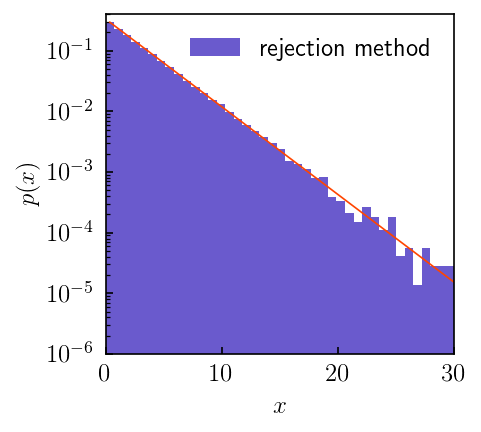

In [24]:
plot_exp_pdf(yexp, pdf_exp, label='rejection method', args=[beta,], figsize=3)

### Special cases: drawing Gaussian random numbers and distributions symmetric around zero

The Gaussian numbers can be drawn using the <a href="https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform">Box-Mueller method.</a>. 

If $u_1$ and $u_2$ are uniformly distributed random numbers in $(0,1)$, the following two numbers are drawn from the Gaussian pdf of zero mean and unit variance:


$$g_1=\sqrt{-2\ln u_1}\cos 2\pi u_2;\ \ \ g_2=\sqrt{-2\ln u_1}\sin 2\pi u_2 $$

Using Gaussian samples you can also create samples of some other distributions, such as $\chi^2$ and Student $t$ distribution.

Overall, though, it is more efficient to use the <a href="https://en.wikipedia.org/wiki/Ziggurat_algorithm">*ziggurat algorithm*</a> of Marsaglia & Tang (2000) to sample symmetric unimodal distributions such as Gaussian and Student $t$. However, this algorithm won't work for assymetric distributions like $\chi^2$.  


### Distribution of the mean of squares of Gaussian numbers

Suppose that we have $\nu$ random numbers drawn from the Gaussian pdf with the mean of $\mu$ and rms dispersion $\sigma$, $\{g_i\}$, $i=0,\ldots,\nu-1$. Given that $\nu$ is finite, the mean of the squares of these numbers, $\langle g^2\rangle$, will also be a random number that fluctuates for different samples of $\nu$ random gaussian numbers. 

What is the distribution function of the random number $\langle g^2\rangle$? 

### Generating correlated random samples

In practical applications one often needs to generate correlated random numbers reflecting correlations in the underlying model. 

Suppose we have a sequence of $N$ ($N\geq 2$) *uncorrelated* random numbers with zero mean and unit variance, $\vec{x}=\{x_i\}$, $\langle \vec{x}\rangle=0$ and $\langle\vec{x}\cdot\vec{x}^T\rangle = I,$
where $I$ is a unitary matrix and angle brackets denote averaging. 

We want to generate a sequence $N$ correlated random numbers, $\vec{y}=\{y_i\}$, with correlations given by an $N\times N$ * covariance matrix*, $C\equiv \langle \vec{y}\cdot\vec{y}^T\rangle$, with elements 
\begin{equation}
C_{ij}=\frac{1}{N_s-1}\sum\limits_{k=1}^{N_s}(y_{ik}-\langle{y}_i\rangle)(y_{jk}-\langle{y}_j\rangle),
\end{equation}
where averaging is done over some number $N_s$ of sample realizations of $\vec{y}$.

Thus, given a vector of uncorrelated random numbers $\vec{x}$ to generate a vector of random samples $\vec{y}$ correlated among each other with correlations given by the covariance matrix $C$, we need to find a transformation matrix $M$ that satisfies the following two equations:
\begin{equation}
\vec{y}=M\cdot \vec{x},\ \ \ C=\langle\vec{y}\cdot\vec{y}^T\rangle.
\end{equation}

Substituting the left equation into the right one and taking into account that $\vec{x}$ has unit variance, we have:
\begin{equation}
C=\langle M\cdot \vec{x}\cdot\vec{x}^T\cdot M^T\rangle = M\cdot\langle\vec{x}\cdot\vec{x}^T\rangle\cdot M^T=M\cdot M^T.
\end{equation}

In other words, $M$ is the result of a decomposition of $C$ into a product of a matrix and its transpose. 

### Computing $M$ using Cholesky decomposition

For a covariance matrix that is by its definition symmetric and positive-definite, the most efficient way to achieve this is to use the *Cholesky decomposition*: $C=L\cdot L^T$, where  $L$ is the lower triangular matrix. 

So the matrix $M$ we are seeking is the lower rectangular matrix resulting from the Cholesky decomposition of the covariance matrix $C$.
Standard linear algebra libraries always include a Cholesky decomposition routine (e.g., <tt>numpy.linalg.cholesky</tt> in numpy).

The required correlated numbers drawn from the same distribution as $\{x_i\}$ but which have the required covariance matrix and mean $\langle\vec{y}\rangle$ are then given by 
\begin{equation}
\vec{y}=\langle\vec{y}\rangle + L\cdot\vec{x},\ \ \ \mathrm{or}\ \ \ \ y_i=\langle y_i\rangle + \sum\limits_{j=1}^N L_{ij} x_j.
\end{equation}

### Importance sampling

Often we are interested not in the samples from a given distribution $p(x)$ themselves, but rather in averages of various quantities over that distribution. For example, average of function $g(x)$ over $p(x)$ distribution:

$$
\bar{g}_{p} = \int\limits_a^{b}g(x)p(x)dx \approx \frac{1}{N_s}\sum\limits_{i=1}^{N_s} g(x_{i,p}),\ \ \mathrm{where}\ \ x_{i,p}\sim p(x),
$$
where the last part indicates that $x_{i,p}$ are samples drawn from $p(x)$.

If this is the case and $p(x)$ is a distribution that's difficult to sample from, we can choose a function, $q(x)$, called the *importance* function, that's easy to sample from, and re-write the expression for $\bar{g}_p$ as

$$
\bar{g}_{p} = \int\limits_a^{b}g(x)\,\frac{p(x)}{q(x)}\, q(x)dx \approx \frac{1}{N_s}\sum\limits_{i=1}^{N_s} g(x_{i,q})\,\frac{p(x_{i,q})}{q(x_{i,q})},\ \ \mathrm{where}\ \ x_{i,q}\sim q(x).
$$

Thus, we can get an estimate of an average (or any other moment) over a given distribution, by sampling from a different distribution. Note that for numerical stability reasons, $p/q$ ratio should never be overly large. Thus $q(x)$ is chosen in such a way that $p(x)/q(x)$ goes to zero or varies mildly as $p(x)$ goes to zero. 

The importance sampling is useful not only because it allows to compute averages over distribution by sampling an easier to sample distribution, but also because
such averages can be more accurate than the straightforward average over $p(x)$. This is because sampling from $q(x)$ can concentrate the samples into *important* regions that contribute the most to the integral. 